In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

wine = pd.read_csv('winequality-red.csv', delimiter = ',')


# Data preprocessing
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [2]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [3]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [40]:
X = wine.drop('quality', axis = 1)
y = wine['quality']


# Split dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


# Apply standard scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [5]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


#### Naive Bayes Classification Algorithm

> Default

[[305  42]
 [ 19  34]]
Accuracy: 0.8475
Precision: 0.4473684210526316


Text(0.5, 257.44, 'Predicted')

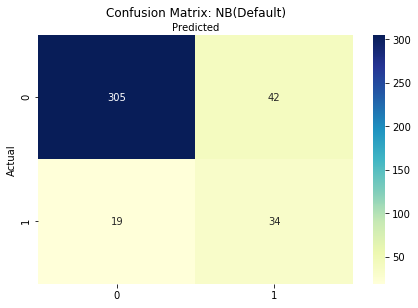

In [6]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate model performance
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))


class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix: NB(Default)', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### Logistic Regression Classification Algorithm

> Default

[[338   9]
 [ 37  16]]
Accuracy: 0.885
Precision: 0.64


Text(0.5, 257.44, 'Predicted')

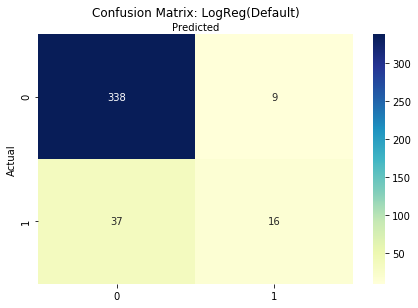

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate model performance
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))


class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix: LogReg(Default)', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

> Modified LogReg

In [16]:
best_score = 0

for C in [0.1, 0.8, 0.9, 1., 1.1, 1.2, 1.3, 1.4]:
    
    model = LogisticRegression(C=C)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    if score > best_score:
        best_score = score
        best_parameters = {'C':C}

print("Best score:{:.2f}".format(best_score) )
print("Best parameters:", best_parameters)

Best score:0.89
Best parameters: {'C': 0.1}


[[339   8]
 [ 38  15]]
Accuracy: 0.885
Precision: 0.6521739130434783


Text(0.5, 257.44, 'Predicted')

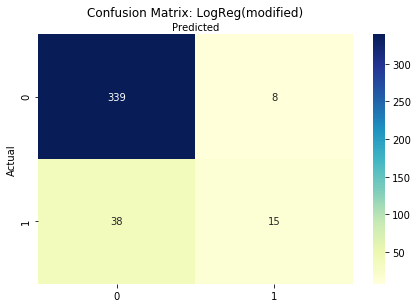

In [17]:
model = LogisticRegression(**best_parameters)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model performance
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))


class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix: LogReg(modified)', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

> LogReg with C = 100

[[337  10]
 [ 37  16]]
Accuracy: 0.8825
Precision: 0.6153846153846154


Text(0.5, 257.44, 'Predicted')

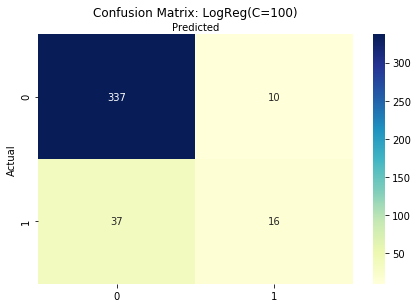

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C = 100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate model performance
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))


class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix: LogReg(C=100)', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

> LogReg with C = 0.01

[[346   1]
 [ 51   2]]
Accuracy: 0.87
Precision: 0.6666666666666666


Text(0.5, 257.44, 'Predicted')

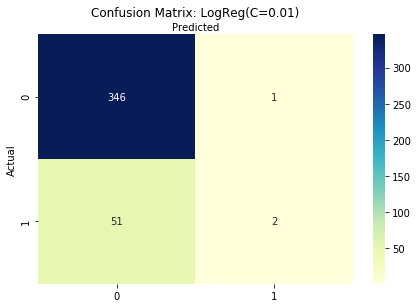

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C = 0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate model performance
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))


class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix: LogReg(C=0.01)', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

> LogReg with (C = 0.01, penalty = L1)

[[338   9]
 [ 37  16]]
Accuracy: 0.885
Precision: 0.64


Text(0.5, 257.44, 'Predicted')

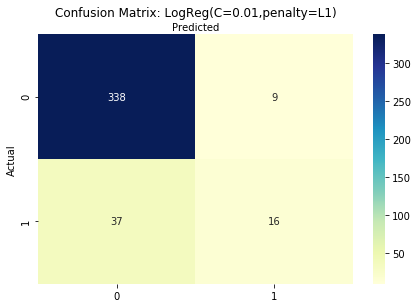

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty = 'l1', solver = 'liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate model performance
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))


class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix: LogReg(C=0.01,penalty=L1)', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### SVM

> Default

[[341   6]
 [ 39  14]]
Accuracy: 0.8875
Precision: 0.7


Text(0.5, 257.44, 'Predicted')

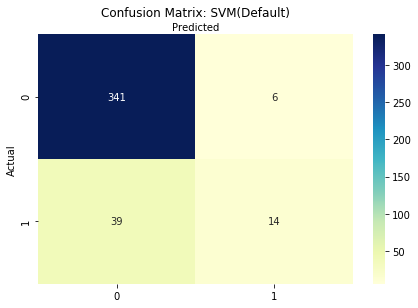

In [11]:
from sklearn import svm

model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate model performance
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))


class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix: SVM(Default)', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

> Modified SVM

In [14]:
best_score = 0

for gamma in [0.1, 0.8, 0.9, 1., 1.1, 1.2, 1.3, 1.4]:
    
    for kernel in ['linear', 'rbf']:
        
        for C in [0.1, 0.8, 0.9, 1., 1.1, 1.2, 1.3, 1.4]:
            
            model = svm.SVC(gamma=gamma, kernel=kernel, C=C)
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            
            if score > best_score:
                best_score = score
                best_parameters = {'gamma':gamma, 'kernel':kernel, 'C':C}

print("Best score:{:.2f}".format(best_score) )
print("Best parameters:", best_parameters)

Best score:0.92
Best parameters: {'gamma': 1.3, 'kernel': 'rbf', 'C': 1.3}


[[345   2]
 [ 29  24]]
Accuracy: 0.9225
Precision: 0.9230769230769231


Text(0.5, 257.44, 'Predicted')

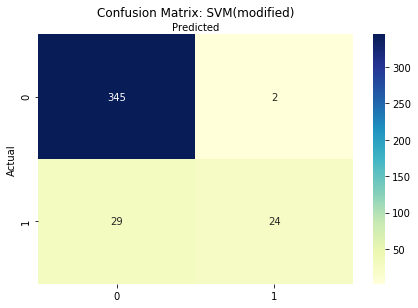

In [15]:
model = svm.SVC(**best_parameters)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model performance
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))


class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix: SVM(modified)', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### Decision Tree

> Default

[[323  24]
 [ 24  29]]
Accuracy: 0.88
Precision: 0.5471698113207547


Text(0.5, 257.44, 'Predicted')

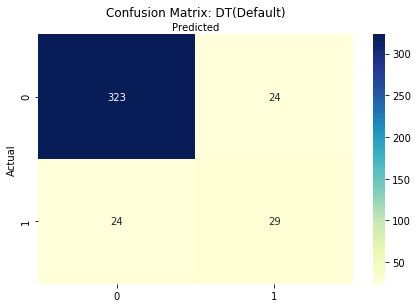

In [18]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate model performance
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))


class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix: DT(Default)', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

> Modified DT

In [21]:
best_score = 0

for max_depth in [3, None]:
    
    model = tree.DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    if score > best_score:
        best_score = score
        best_parameters = {'max_depth':max_depth}

print("Best score:{:.2f}".format(best_score) )
print("Best parameters:", best_parameters)

Best score:0.88
Best parameters: {'max_depth': 3}


[[335  12]
 [ 38  15]]
Accuracy: 0.875
Precision: 0.5555555555555556


Text(0.5, 257.44, 'Predicted')

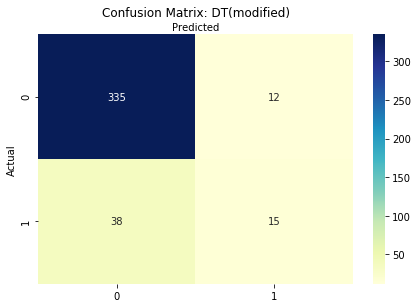

In [22]:
model = tree.DecisionTreeClassifier(**best_parameters)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model performance
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))


class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix: DT(modified)', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### RandomForest

> Default

[[335  12]
 [ 32  21]]
Accuracy: 0.89
Precision: 0.6363636363636364


Text(0.5, 257.44, 'Predicted')

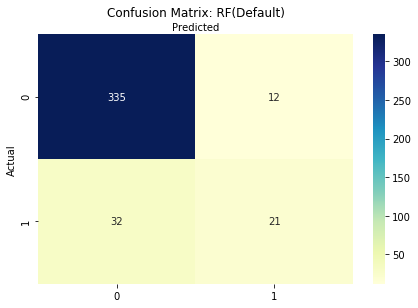

In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate model performance
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))


class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix: RF(Default)', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

> Modified RF

In [24]:
best_score = 0

for n_estimators in [100, 200]:
    
    model = RandomForestClassifier(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    if score > best_score:
        best_score = score
        best_parameters = {'n_estimators':n_estimators}

print("Best score:{:.2f}".format(best_score) )
print("Best parameters:", best_parameters)

Best score:0.89
Best parameters: {'n_estimators': 200}


[[337  10]
 [ 31  22]]
Accuracy: 0.8975
Precision: 0.6875


Text(0.5, 257.44, 'Predicted')

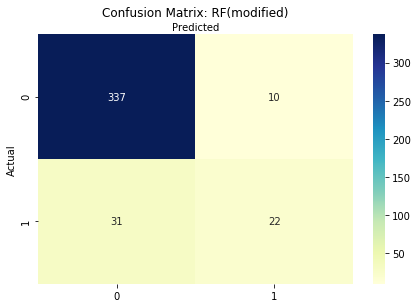

In [25]:
model = RandomForestClassifier(**best_parameters)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model performance
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))


class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix: RF(modified)', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### k-NN

> Default

[[332  15]
 [ 29  24]]
Accuracy: 0.89
Precision: 0.6153846153846154


Text(0.5, 257.44, 'Predicted')

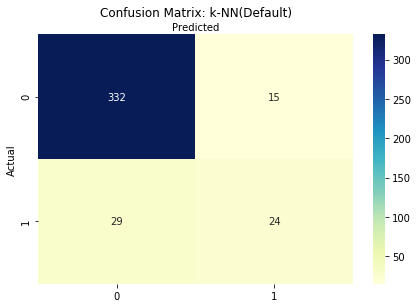

In [26]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate model performance
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))


class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix: k-NN(Default)', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

> Modified k-NN

In [27]:
best_score = 0

for n_neighbors in [1, 3, 5]:
    
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    if score > best_score:
        best_score = score
        best_parameters = {'n_neighbors':n_neighbors}

print("Best score:{:.2f}".format(best_score) )
print("Best parameters:", best_parameters)

Best score:0.90
Best parameters: {'n_neighbors': 1}


[[322  25]
 [ 17  36]]
Accuracy: 0.895
Precision: 0.5901639344262295


Text(0.5, 257.44, 'Predicted')

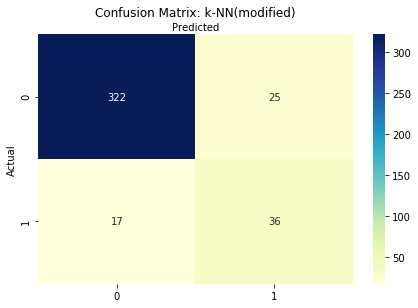

In [28]:
model = KNeighborsClassifier(**best_parameters)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model performance
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))


class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix: k-NN(modified)', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

### SVM with cross validation

In [42]:
from sklearn.model_selection import cross_val_score


# Default
model = svm.SVC()
score_def = cross_val_score(model, X_train, y_train, cv = 11)
print("CV score:", score_def)
print("CV average scroe: {:.2f}".format(score_def.mean()))

CV score: [0.88073394 0.90825688 0.87155963 0.90825688 0.88073394 0.83486239
 0.88990826 0.89908257 0.87155963 0.88073394 0.88990826]
CV average scroe: 0.88


Best score:0.91
Best parameters: {'gamma': 1.0, 'kernel': 'rbf', 'C': 1.4}
[[343   4]
 [ 29  24]]
Accuracy: 0.9175
Precision: 0.8571428571428571


Text(0.5, 257.44, 'Predicted')

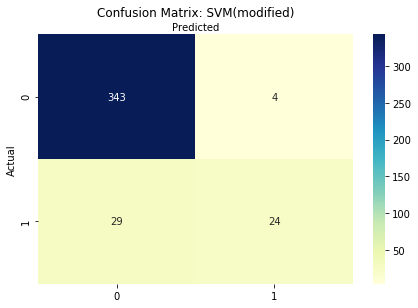

In [43]:
# Modified CV
best_score = 0

for gamma in [0.1, 0.8, 0.9, 1., 1.1, 1.2, 1.3, 1.4]:
    
    for kernel in ['linear', 'rbf']:
        
        for C in [0.1, 0.8, 0.9, 1., 1.1, 1.2, 1.3, 1.4]:
            
            model = svm.SVC(gamma=gamma, kernel=kernel, C=C)
            scores = cross_val_score(model, X_train, y_train, cv = 11)
            score = np.mean(scores)
            
            if score > best_score:
                best_score = score
                best_parameters = {'gamma':gamma, 'kernel':kernel, 'C':C}

print("Best score:{:.2f}".format(best_score) )
print("Best parameters:", best_parameters)

model = svm.SVC(**best_parameters)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model performance
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))


class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix: SVM(modified)', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [44]:
# Another code
param_grid = {'C': [0.1, 0.8, 0.9, 1., 1.1, 1.2, 1.3, 1.4],
             'kernel': ['linear', 'rbf'],
             'gamma': [0.1, 0.8, 0.9, 1., 1.1, 1.2, 1.3, 1.4]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(svm.SVC(), param_grid, cv = 11, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best CV score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n", grid_search.best_estimator_)

Best parameters: {'C': 1.4, 'gamma': 1.0, 'kernel': 'rbf'}
Best CV score: 0.91
Best estimator:
 SVC(C=1.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
